In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("House Price Prediction Dataset.csv")

df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(exclude='number').columns
print(num_col, cat_col)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price'], dtype='object') Index(['Location', 'Condition', 'Garage'], dtype='object')


In [5]:
df[num_col].min()

Id               1
Area           501
Bedrooms         1
Bathrooms        1
Floors           1
YearBuilt     1900
Price        50005
dtype: int64

In [6]:
df[num_col].max()

Id             2000
Area           4999
Bedrooms          5
Bathrooms         4
Floors            3
YearBuilt      2023
Price        999656
dtype: int64

In [7]:
df[num_col].mean()

Id             1000.5000
Area           2786.2095
Bedrooms          3.0035
Bathrooms         2.5525
Floors            1.9935
YearBuilt      1961.4460
Price        537676.8550
dtype: float64

In [8]:
df[num_col].median()

Id             1000.5
Area           2833.0
Bedrooms          3.0
Bathrooms         3.0
Floors            2.0
YearBuilt      1961.0
Price        539254.0
dtype: float64

In [9]:
df[num_col].std()

Id              577.494589
Area           1295.146799
Bedrooms          1.424606
Bathrooms         1.108990
Floors            0.809188
YearBuilt        35.926695
Price        276428.845719
dtype: float64

In [10]:
df[num_col].quantile(0.25)

Id              500.75
Area           1653.00
Bedrooms          2.00
Bathrooms         2.00
Floors            1.00
YearBuilt      1930.00
Price        300098.00
Name: 0.25, dtype: float64

In [11]:
df[num_col].var()

Id           3.335000e+05
Area         1.677405e+06
Bedrooms     2.029503e+00
Bathrooms    1.229859e+00
Floors       6.547851e-01
YearBuilt    1.290727e+03
Price        7.641291e+10
dtype: float64

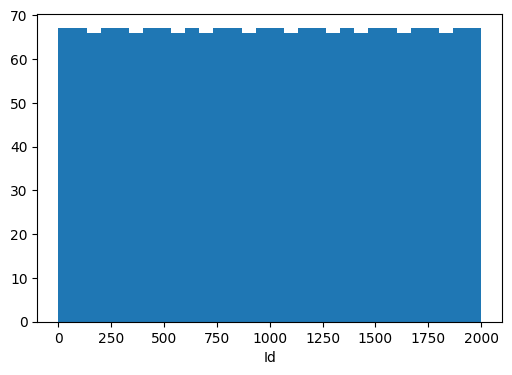

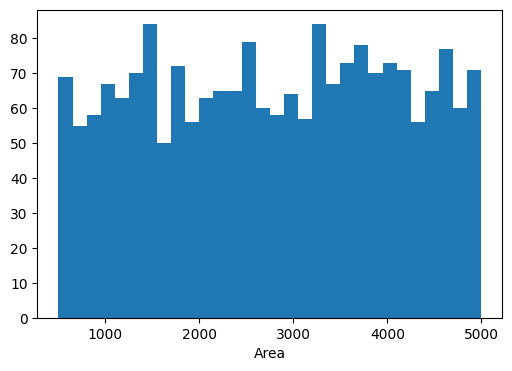

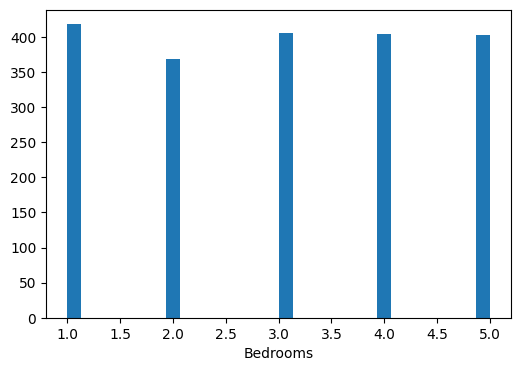

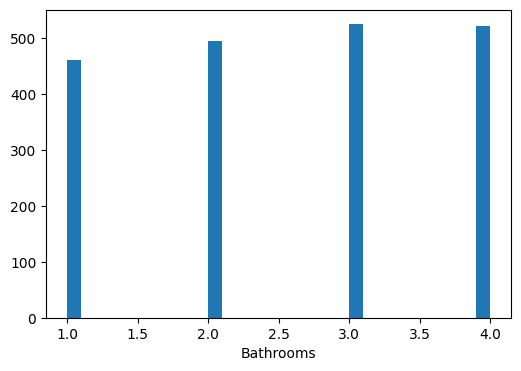

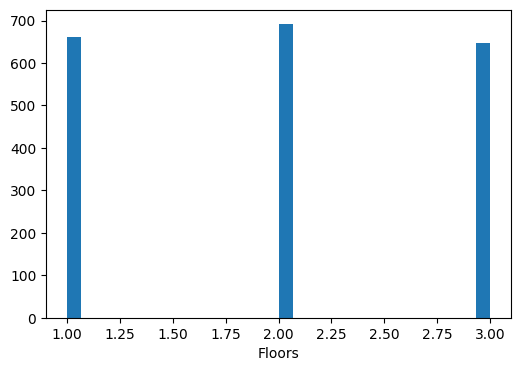

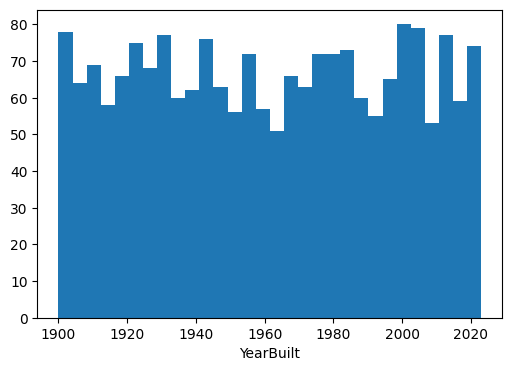

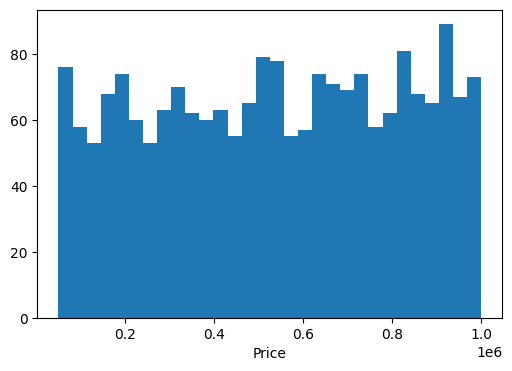

In [12]:
for col in num_col:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.show()

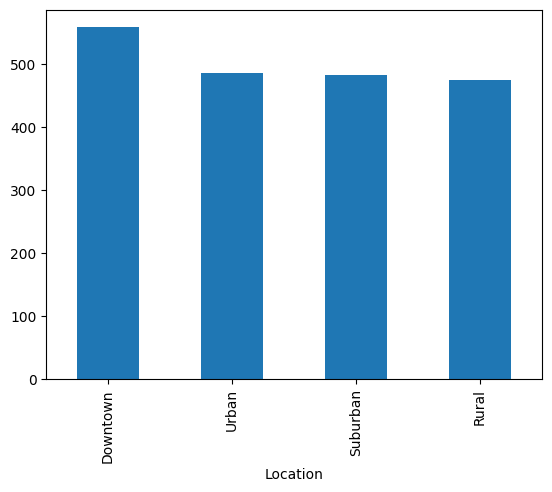

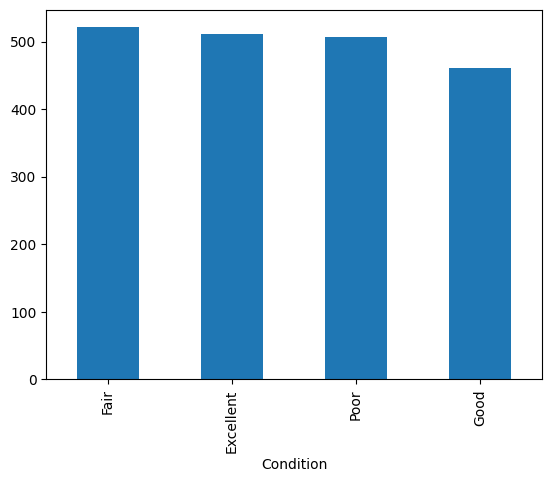

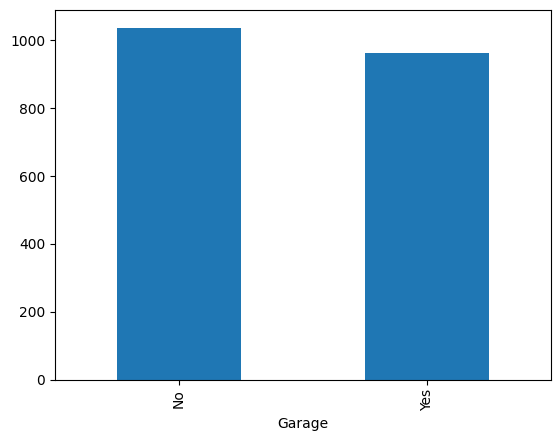

In [13]:
for col in cat_col:
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.show()

In [14]:
df.groupby("Area")["Price"].agg("mean", "median", "std")

Area
501     513411.0
502     184962.0
503     850118.0
504     169574.0
505     727823.0
          ...   
4994    515100.0
4995    286028.0
4996    576958.5
4997    286887.0
4999    139460.0
Name: Price, Length: 1622, dtype: float64

In [15]:
for cat in cat_col:
    print(f"Summary grouped by: {cat}")
    group_stats = df.groupby(cat)[num_col].agg(['mean', 'median', 'min', 'max', 'std'])
    print(group_stats)

Summary grouped by: Location
                   Id                                       Area               \
                 mean  median min   max         std         mean  median  min   
Location                                                                        
Downtown  1020.191756  1065.5   1  1995  584.989681  2813.625448  2846.0  504   
Rural     1007.386076  1011.0   7  1998  575.134617  2745.951477  2679.5  501   
Suburban   954.503106   936.0   4  2000  574.096412  2794.020704  2883.0  501   
Urban     1016.921649   993.0   6  1999  573.777405  2786.232990  2876.0  502   

                             ...    YearBuilt                                 \
           max          std  ...         mean  median   min   max        std   
Location                     ...                                               
Downtown  4999  1349.332536  ...  1963.851254  1966.5  1900  2023  35.673430   
Rural     4973  1248.336844  ...  1960.854430  1962.0  1900  2023  36.262461   
Sub